# QR Code Genration with Python

Based on https://github.com/reegan-anne/python_qrcode/blob/main/main.ipynb with modifications, especially regarding the transparency.

In [1]:
import qrcode
from PIL import Image
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers import RoundedModuleDrawer,CircleModuleDrawer
from qrcode.image.styles.colormasks import SolidFillColorMask

In [2]:
doi_url= "https://doi.org/10.23170/snu.000000186491.11032.0001717"
ads_url= "https://ui.adsabs.harvard.edu/abs/2024PhDT........21C"

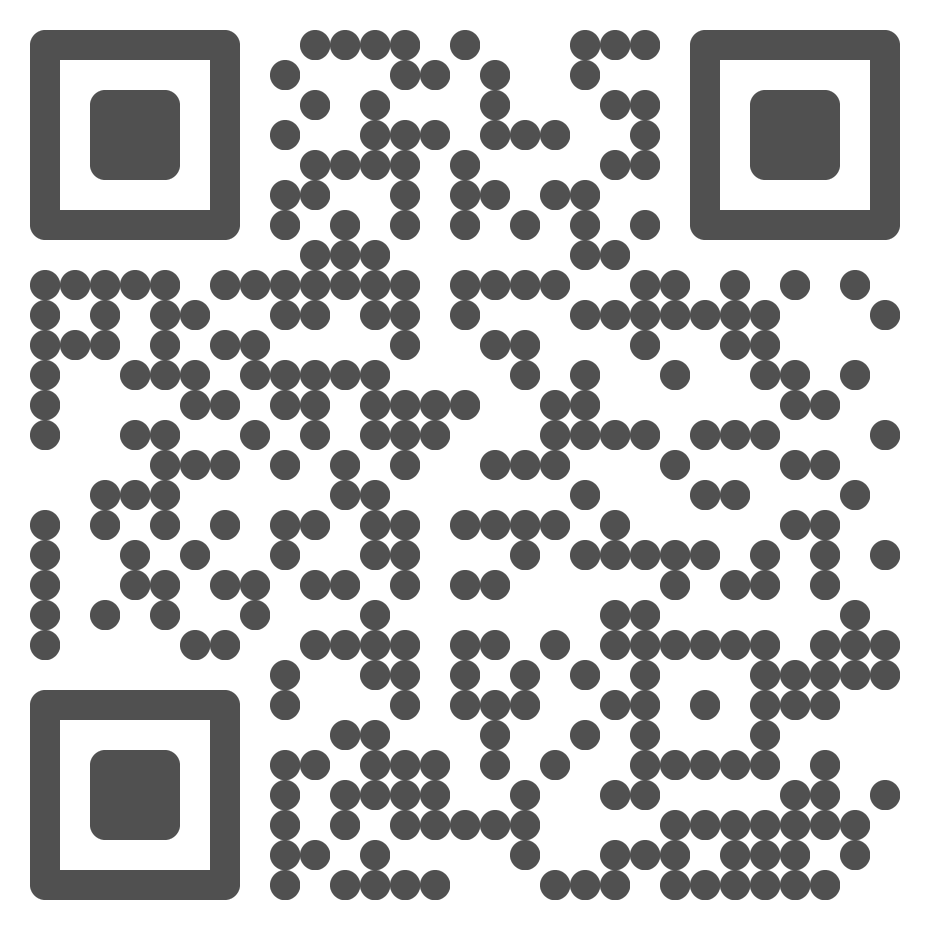

In [3]:
color_qr = [80,80,80]

qr = qrcode.QRCode(
    error_correction=qrcode.constants.ERROR_CORRECT_L, 
    # L, M, Q, H is available, 
    # L is lowest error correction (7%) and H is highest error correction (30%), 
    # making the image size of H larger than L.
    box_size=30, # one "pixel" of QR code in actual pixels of png image.
    border=1, # How many "QR pixels" are added as margins outside the QR code.
)

qr.add_data(ads_url)
img = qr.make_image(
    image_factory=StyledPilImage,
    eye_drawer=RoundedModuleDrawer(radius_ratio=1), # This can be omitted to make the corner "eyes" square
    module_drawer=CircleModuleDrawer(), # This can be replaced or omitted to change QR "pixel" shape.
    color_mask=SolidFillColorMask(front_color=tuple(color_qr+[255]), back_color=tuple(color_qr+[0])), # color for QR. 
    # len(back_color) == 4 of color_mask is important for making QR code transparent!
    fit=True,
    back_color=tuple(color_qr+[0]), # Color for background. +[0] means transparent background.
)
img.save('qr_thesis.png')
img

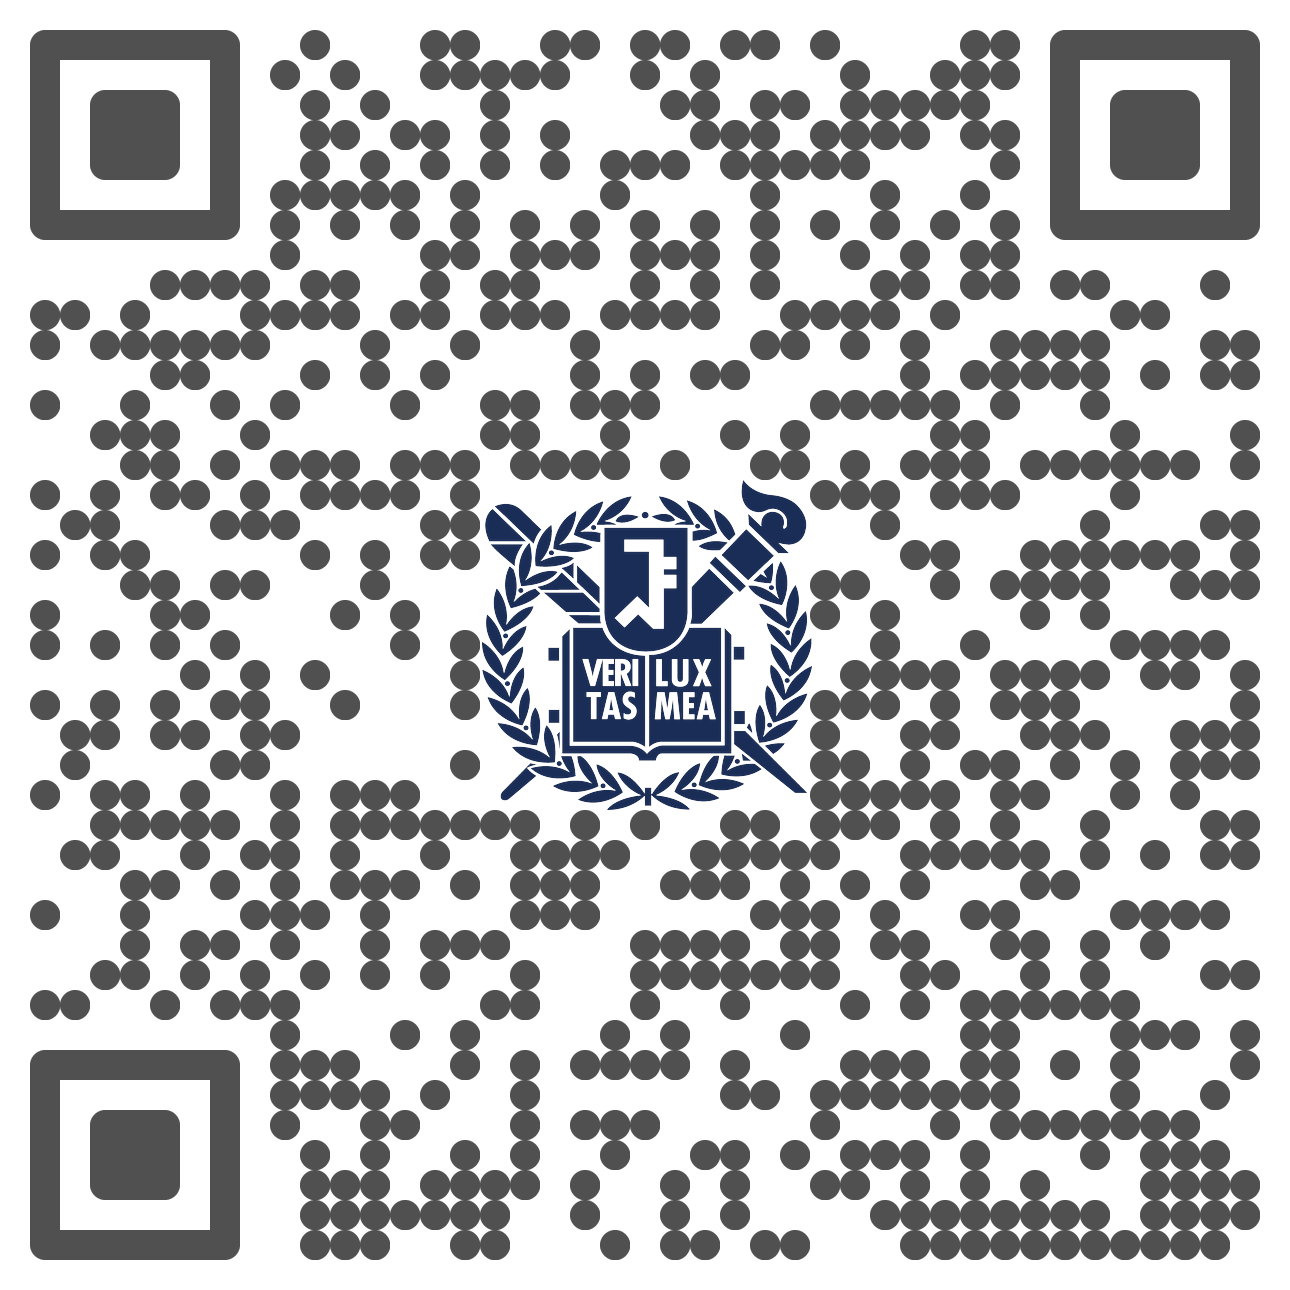

In [4]:
color_qr = [80,80,80]
color_logo = [26,45,86] # Original foreground color of logo
chromakey = (0,255,0,255) # Last must be 255.


fn_logo = 'assets/snu_ui_download.png'
fn_logo_bg = 'assets/snu_ui_white_bg.png'
im = Image.open('assets/snu_ui_download.png')
data = im.getdata()
new_data = []
for item in data:
    new_data.append(chromakey)
im.putdata(new_data)
im.save(fn_logo_bg)
data_logo = data.copy()

qr = qrcode.QRCode(
    error_correction=qrcode.constants.ERROR_CORRECT_H, # H allows up to 30% of area to be used for logos.
    box_size=30, border=1,
)

qr.add_data(doi_url)

img = qr.make_image(
    image_factory=StyledPilImage,
    eye_drawer=RoundedModuleDrawer(radius_ratio=1),
    module_drawer=CircleModuleDrawer(),
    color_mask=SolidFillColorMask(front_color=tuple(color_qr+[255]), back_color=tuple(color_qr+[0])), 
    # len(back_color) == 4 of color_mask is important for making QR code transparent!
    fit=True,
    back_color=tuple(color_qr+[0]),
    embeded_image_path=fn_logo_bg,
    embeded_image_ratio = 0.25, # Should never exceed 0.30 otherwise QR cannot be read.
    # Change it slightly larger than the value on logo to make a bit more room (e.g., 0.26)
)
img = img.convert("RGBA")
data = img.getdata()
new_data = []
for item in data:
    if item==chromakey:
        new_data.append(tuple(color_qr+[0]))  # Transparent white
    else:
        new_data.append(item)
img.putdata(new_data)
img_logo = qr.make_image(
    image_factory=StyledPilImage,
    eye_drawer=RoundedModuleDrawer(radius_ratio=1),
    module_drawer=CircleModuleDrawer(),
    color_mask=SolidFillColorMask(front_color=tuple(color_logo+[0]), back_color=tuple(color_logo+[0])), 
    # len(back_color) == 4 of color_mask is important for making QR code transparent!
    fit=True,
    back_color=tuple(color_logo+[0]), 
    embeded_image_path=fn_logo,
    embeded_image_ratio = 0.25, # Should never exceed 0.30 otherwise QR cannot be read.
)
img.paste(img_logo, (2,0), img_logo) # Normally 0,0 should be fine, but the input logo is not symmetric.


img.save('qr_thesis_logo.png')
img